# **Emotion Recognition From Speech**

![](https://storage.googleapis.com/kaggle-datasets-images/107620/256618/6b13d2f1d0b8d8a00b5aac95477c79a2/dataset-cover.png?t=2019-01-19-18-55-36)

## **Author: Vaibhav Kumar**

### **Life Cycle Of Project**

- **Data Collection:**
- **Data Preprocessing:**
- **Data Augmentation:**
- **Feature Extraction:**
- **Model Training:**
- **Model Evaluation:**
- ***Save The Model:**
- **Model Deployment:**

## **About Dataset**

### **Content**

There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 data points (audio files) in total.

The dataset is organised such that each of the two female actor and their emotions are contain within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format

The Libraries used in this Project Includes:

```python

!pip install librosa numpy pandas matplotlib seaborn scikit-learn tensorflow

```

### **Importing Libries**

In [35]:
# To work with operating System
import os
import sys

# For data analysis and data manipulation
import numpy as np
import pandas as pd

# For Data Visualizaion
import seaborn as sns
import matplotlib.pyplot as plt

# To work wih music and audio analysis
import librosa
import librosa.display

# For Machine Learning tasks
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# To play the audio files
from IPython.display import Audio

# For Deep Learning Tasks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import LSTM, Dense, Dropout

# To Avoid Warnings
import warnings
warnings.filterwarnings('ignore')

## **Prepare Data For Experimentation**



In [2]:
# Define the base directory for the dataset
Tess = '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data'

## **Directory Traversal and DataFrame Creation for Emotion Data**

- This code lists directories in a specified base directory, extracts emotion labels from filenames, and creates a DataFrame containing corresponding file paths and emotions.

In [3]:
# List all directories in the base directory
tess_directory_list = os.listdir(Tess)

# Initialize lists to hold emotions and file paths
file_emotion = []
file_path = []

# Loop through each directory in the dataset
for dir in tess_directory_list:
    # Construct the full path to the current directory
    dir_path = os.path.join(Tess, dir)  # Use os.path.join for proper path construction
    if os.path.isdir(dir_path):  # Check if the path is a directory
        # List all files in the current directory
        directories = os.listdir(dir_path)
        for file in directories:
            # Extract the emotion part from the filename
            part = file.split('.')[0]  # Get the filename without extension
            part = part.split('_')[2]   # Split by underscore and take the emotion part
            
            # Map part to corresponding emotion
            if part == 'ps':
                file_emotion.append('surprise')  # Special case for 'ps'
            else:
                file_emotion.append(part)  # Append the emotion
            
            # Construct the full file path and append to the list
            file_path.append(os.path.join(dir_path, file))  # Use os.path.join for the file path

# Create a DataFrame for emotions
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Create a DataFrame for file paths
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenate the two DataFrames to create a final DataFrame
Tess_df = pd.concat([emotion_df, path_df], axis=1)

# Display the first few rows of the final DataFrame
Tess_df.sample(10)

,Emotions,Path
1345,sad,/kaggle/input/toronto-emotional-speech-set-tes...
1188,angry,/kaggle/input/toronto-emotional-speech-set-tes...
89,fear,/kaggle/input/toronto-emotional-speech-set-tes...
390,angry,/kaggle/input/toronto-emotional-speech-set-tes...
1395,sad,/kaggle/input/toronto-emotional-speech-set-tes...
2642,surprise,/kaggle/input/toronto-emotional-speech-set-tes...
1472,disgust,/kaggle/input/toronto-emotional-speech-set-tes...
2206,happy,/kaggle/input/toronto-emotional-speech-set-tes...
806,neutral,/kaggle/input/toronto-emotional-speech-set-tes...
944,neutral,/kaggle/input/toronto-emotional-speech-set-tes...


### **Visualize Emotions**

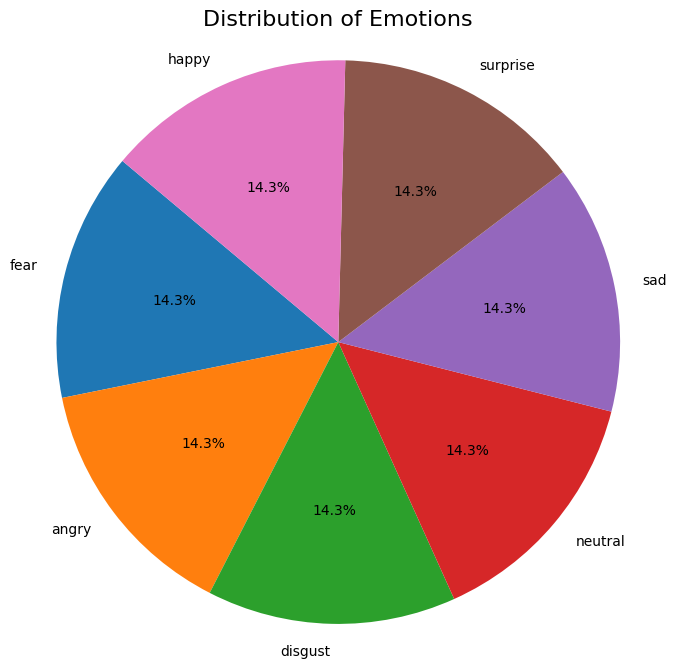

In [4]:
# Count the occurrences of each emotion
emotion_counts = Tess_df['Emotions'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emotions', size=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

## **Waveplots and Spectrograms**

**Waveplots**: Waveplots display the loudness of audio at specific moments in time.

**Spectrograms**: A spectrogram visually represents the spectrum of frequencies of sound or other signals over time. It illustrates how frequencies change with respect to time for particular audio or music signals.

In [5]:
# Define Function to Create Waveplot
def create_waveplot(data, sr, e):
    """
    Create a waveplot for the given audio data.

    Parameters:
    data: ndarray
        Audio time series.
    sr: int
        Sampling rate of the audio.
    e: str
        Emotion associated with the audio.
    """
    plt.figure(figsize=(10, 3))  # Set figure size
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)  # Title with emotion
    librosa.display.waveshow(data, sr=sr)  # Display the waveplot
    plt.xlabel('Time (s)', size=12)  # X-axis label
    plt.ylabel('Amplitude', size=12)  # Y-axis label
    plt.show()  # Show the plot

In [6]:
# Define Function to Create Spectrogram
def create_spectrogram(data, sr, e):
    """
    Create a spectrogram for the given audio data.

    Parameters:
    data: ndarray
        Audio time series.
    sr: int
        Sampling rate of the audio.
    e: str
        Emotion associated with the audio.
    """
    # Convert the audio data into short-term Fourier transform
    X = librosa.stft(data)  # Short-term Fourier transform
    Xdb = librosa.amplitude_to_db(abs(X))  # Convert amplitude to decibels
    
    plt.figure(figsize=(12, 3))  # Set figure size
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)  # Title with emotion
    
    # Display the spectrogram using linear frequency axis
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar(format='%+2.0f dB')  # Add color bar with dB format
    
#     # Optional: Display the spectrogram using logarithmic frequency axis
#     plt.figure(figsize=(12, 3))  # New figure for log scale
#     plt.title('Spectrogram (Log Scale) for audio with {} emotion'.format(e), size=15)  # Title for log scale
#     librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
#     plt.colorbar(format='%+2.0f dB')  # Add color bar for log scale

    plt.show()  # Show the plot

### **Let's Plot `fear`**

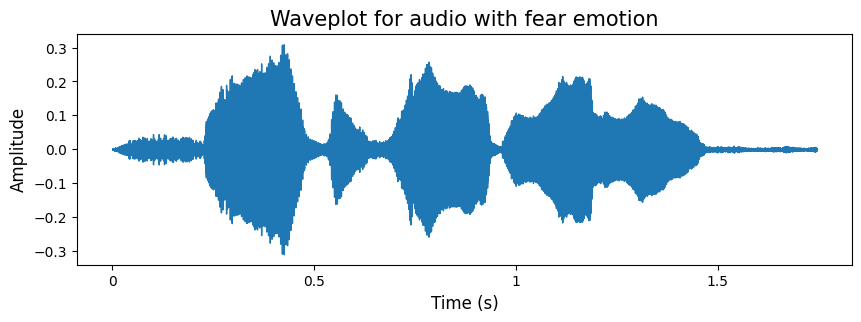

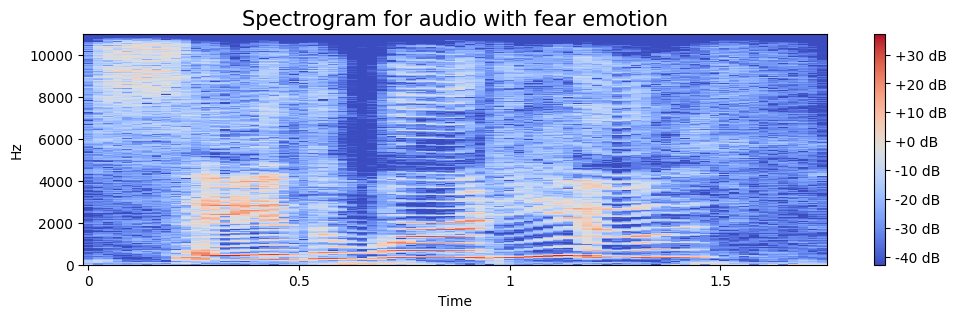

In [7]:
# Define the emotion for which to visualize audio
emotion = 'fear'

# Extract the file path corresponding to the specified emotion
# Assuming Tess_df is already defined and contains the audio file paths
path = np.array(Tess_df.Path[Tess_df.Emotions == emotion])[1]  # Get the second occurrence of the specified emotion

# Load the audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Create and display the waveplot for the loaded audio data
create_waveplot(data, sampling_rate, emotion)

# Create and display the spectrogram for the loaded audio data
create_spectrogram(data, sampling_rate, emotion)

# Display the audio player for the selected audio file
Audio(path)  # Using IPython's Audio to play the audio

### **Let's Plot `sad`**

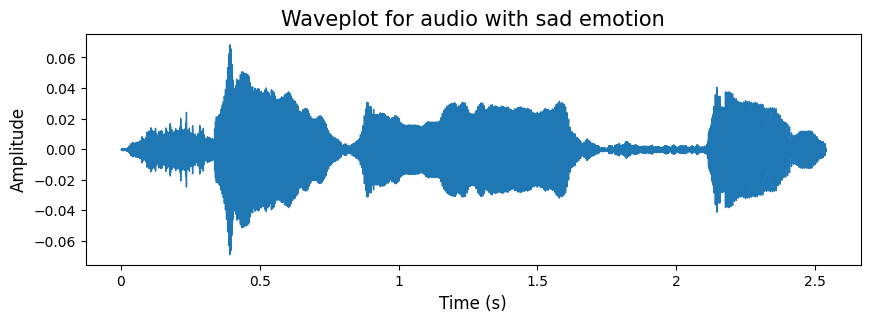

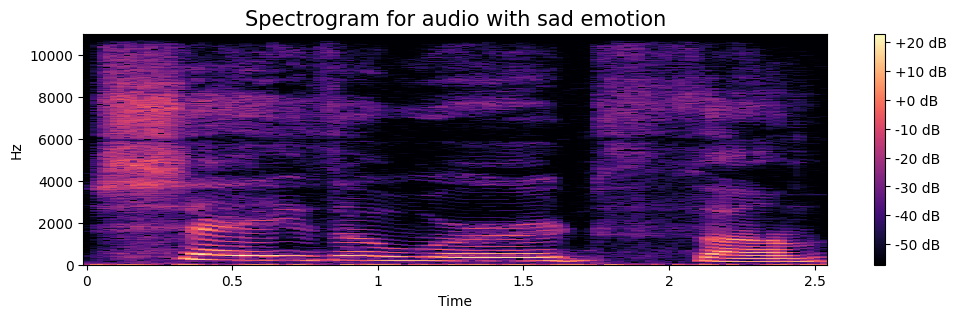

In [8]:
# Define the emotion for which to visualize audio
emotion = 'sad'

# Extract the file path corresponding to the specified emotion
# Assuming Tess_df is already defined and contains the audio file paths
path = np.array(Tess_df.Path[Tess_df.Emotions == emotion])[1]  # Get the second occurrence of the specified emotion

# Load the audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Create and display the waveplot for the loaded audio data
create_waveplot(data, sampling_rate, emotion)

# Create and display the spectrogram for the loaded audio data
create_spectrogram(data, sampling_rate, emotion)

# Display the audio player for the selected audio file
Audio(path)  # Using IPython's Audio to play the audio

### **Let's Plot `surprise`**

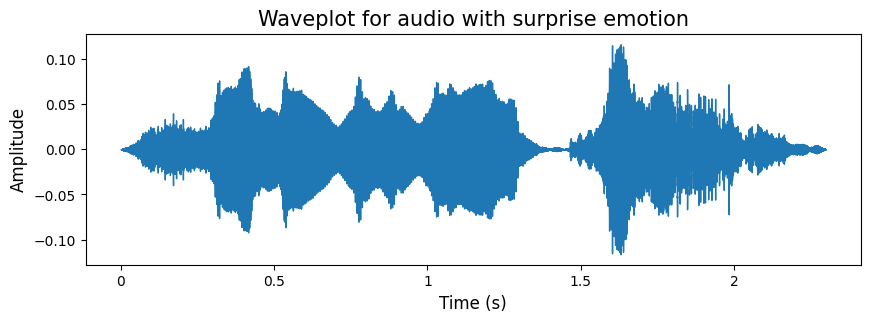

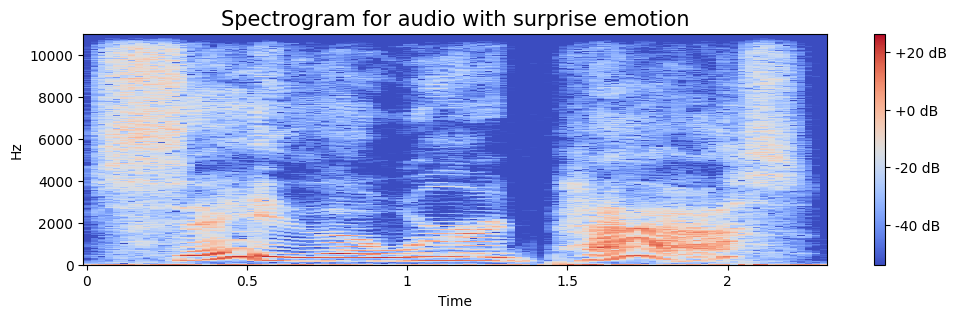

In [9]:
# Define the emotion for which to visualize audio
emotion = 'surprise'

# Extract the file path corresponding to the specified emotion
# Assuming Tess_df is already defined and contains the audio file paths
path = np.array(Tess_df.Path[Tess_df.Emotions == emotion])[1]  # Get the second occurrence of the specified emotion

# Load the audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Create and display the waveplot for the loaded audio data
create_waveplot(data, sampling_rate, emotion)

# Create and display the spectrogram for the loaded audio data
create_spectrogram(data, sampling_rate, emotion)

# Display the audio player for the selected audio file
Audio(path)  # Using IPython's Audio to play the audio

### **Let's Plot `disgust`**

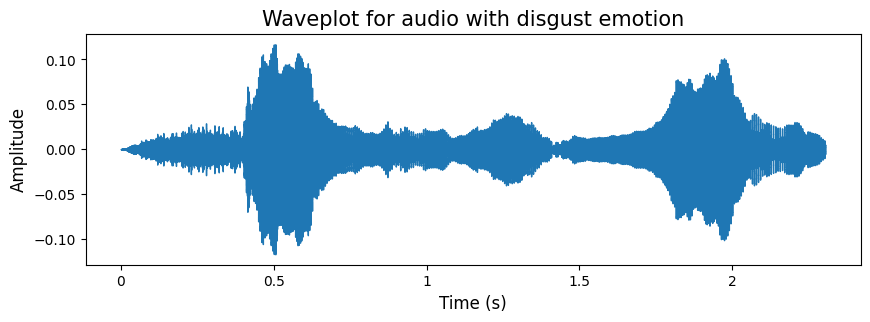

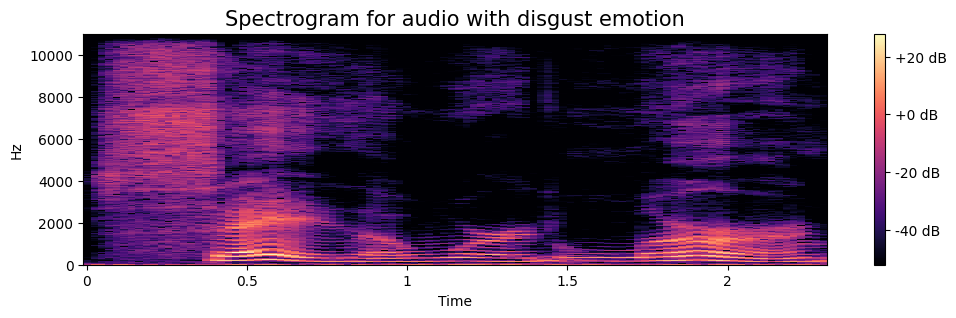

In [10]:
# Define the emotion for which to visualize audio
emotion = 'disgust'

# Extract the file path corresponding to the specified emotion
# Assuming Tess_df is already defined and contains the audio file paths
path = np.array(Tess_df.Path[Tess_df.Emotions == emotion])[1]  # Get the second occurrence of the specified emotion

# Load the audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Create and display the waveplot for the loaded audio data
create_waveplot(data, sampling_rate, emotion)

# Create and display the spectrogram for the loaded audio data
create_spectrogram(data, sampling_rate, emotion)

# Display the audio player for the selected audio file
Audio(path)  # Using IPython's Audio to play the audio

### **Let's Plot `angry`**

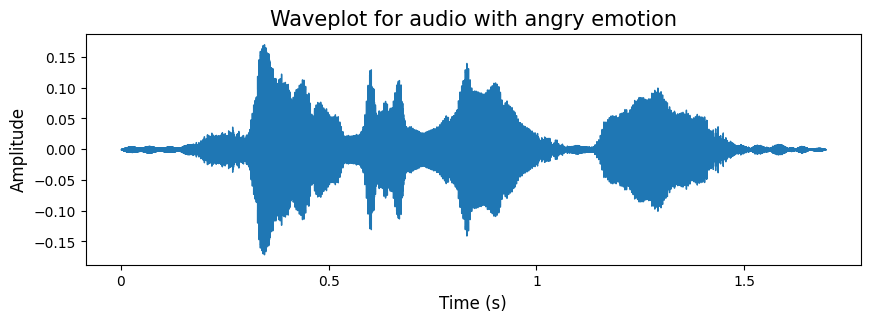

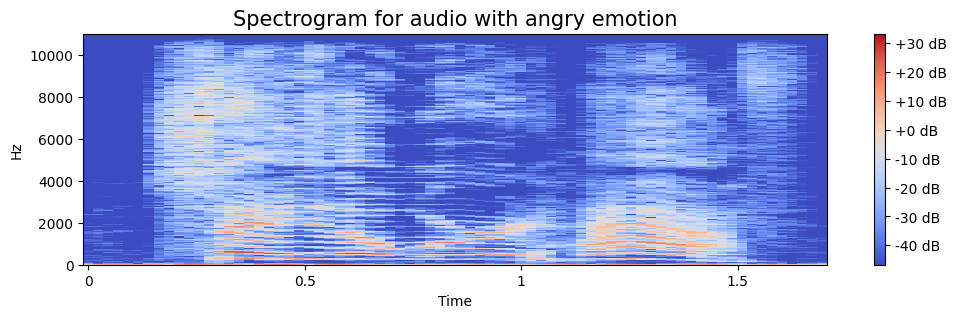

In [11]:
# Define the emotion for which to visualize audio
emotion = 'angry'

# Extract the file path corresponding to the specified emotion
# Assuming Tess_df is already defined and contains the audio file paths
path = np.array(Tess_df.Path[Tess_df.Emotions == emotion])[1]  # Get the second occurrence of the specified emotion

# Load the audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Create and display the waveplot for the loaded audio data
create_waveplot(data, sampling_rate, emotion)

# Create and display the spectrogram for the loaded audio data
create_spectrogram(data, sampling_rate, emotion)

# Display the audio player for the selected audio file
Audio(path)  # Using IPython's Audio to play the audio

### **Let's Plot `happy`**

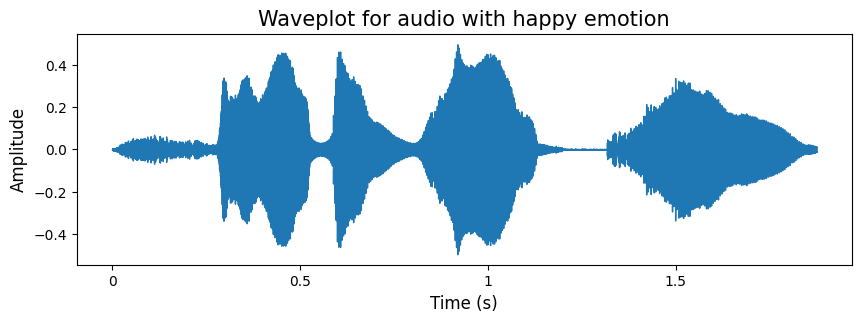

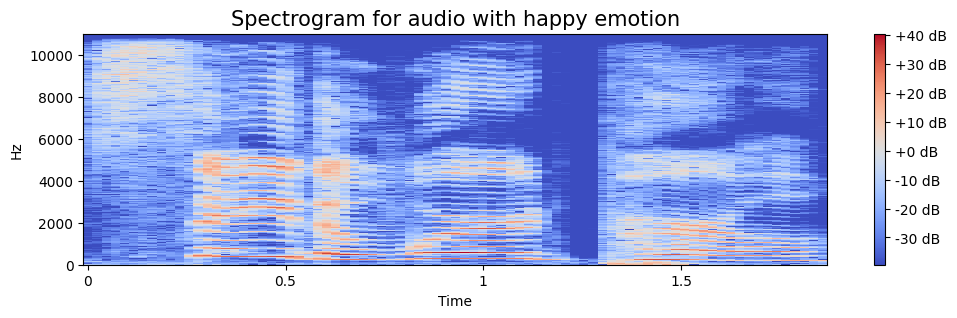

In [12]:
# Define the emotion for which to visualize audio
emotion = 'happy'

# Extract the file path corresponding to the specified emotion
# Assuming Tess_df is already defined and contains the audio file paths
path = np.array(Tess_df.Path[Tess_df.Emotions == emotion])[1]  # Get the second occurrence of the specified emotion

# Load the audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Create and display the waveplot for the loaded audio data
create_waveplot(data, sampling_rate, emotion)

# Create and display the spectrogram for the loaded audio data
create_spectrogram(data, sampling_rate, emotion)

# Display the audio player for the selected audio file
Audio(path)  # Using IPython's Audio to play the audio

### **Let's Plot `neutral`**

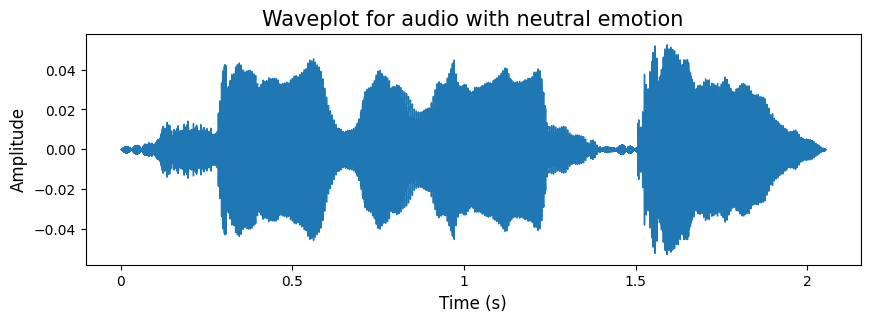

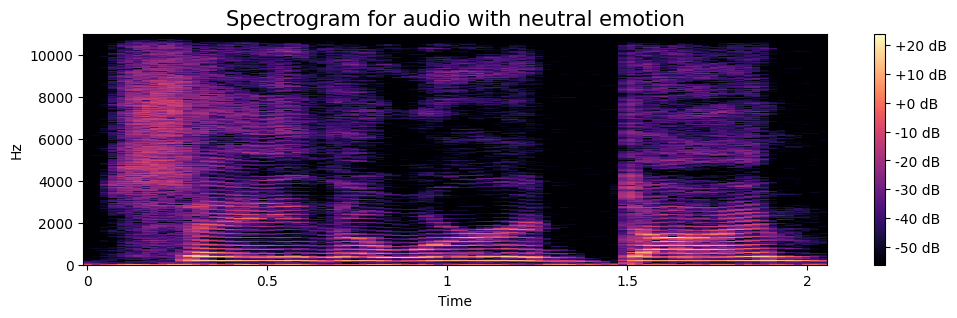

In [13]:
# Define the emotion for which to visualize audio
emotion = 'neutral'

# Extract the file path corresponding to the specified emotion
# Assuming Tess_df is already defined and contains the audio file paths
path = np.array(Tess_df.Path[Tess_df.Emotions == emotion])[1]  # Get the second occurrence of the specified emotion

# Load the audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Create and display the waveplot for the loaded audio data
create_waveplot(data, sampling_rate, emotion)

# Create and display the spectrogram for the loaded audio data
create_spectrogram(data, sampling_rate, emotion)

# Display the audio player for the selected audio file
Audio(path)  # Using IPython's Audio to play the audio

## **Data Augmentation**

Data augmentation involves creating new synthetic samples by introducing small modifications to our existing training dataset. For audio data, common augmentation techniques include:

- **Noise Injection**: Adding background noise to make the model robust against irrelevant sounds.
- **Time Shifting**: Slightly shifting the audio in time to simulate variations in starting points.
- **Pitch and Speed Changes**: Altering the pitch or speed to help the model generalize across different audio characteristics.

The goal of these techniques is to enhance the model's robustness to these perturbations, improving its ability to generalize well to unseen data. It's important that any modifications maintain the same label as the original training sample.

In the case of image data, augmentation methods can include shifting, zooming, and rotating the images.

Now, let's explore which augmentation techniques are most effective for our dataset.

In [14]:
# Function to add noise to the audio data
def noise(data):
    """
    Add random noise to the audio data.

    Parameters:
    data: ndarray
        Audio time series.

    Returns:
    ndarray
        Noisy audio data.
    """
    # Calculate the noise amplitude based on the maximum value of the audio data
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    
    # Add Gaussian noise to the audio data
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

In [15]:
# Function to stretch the audio data in time
def stretch(data, rate=0.8):
    """
    Stretch the audio data in time.

    Parameters:
    data: ndarray
        Audio time series.
    rate: float
        The factor by which to stretch the audio. Less than 1.0 slows it down.

    Returns:
    ndarray
        Time-stretched audio data.
    """
    return librosa.effects.time_stretch(data, rate=rate)  # Pass rate as a keyword argument

In [16]:
# Function to shift the audio data in time
def shift(data):
    """
    Shift the audio data in time.

    Parameters:
    data: ndarray
        Audio time series.

    Returns:
    ndarray
        Time-shifted audio data.
    """
    # Determine a random shift value between -5 and 5 seconds, converted to samples
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    
    # Shift the audio data using numpy's roll
    return np.roll(data, shift_range)

In [17]:
# Function to change the pitch of the audio data
def pitch(data, sampling_rate, pitch_factor=0.7):
    """
    Change the pitch of the audio data.

    Parameters:
    data: ndarray
        Audio time series.
    sampling_rate: int
        Sampling rate of the audio.
    pitch_factor: float
        Factor to shift the pitch. Greater than 1.0 raises pitch, less than 1.0 lowers it.

    Returns:
    ndarray
        Pitch-shifted audio data.
    """
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)  # Use keyword arguments

### **Data Augmentation Setup**

In [18]:
# Example usage: Load audio data from a path and apply augmentation techniques

path = np.array(Tess_df.Path)[1]  # Get the path of a specific audio file
data, sample_rate = librosa.load(path)  # Load the audio file

### **Simple Audio Without Data Augmentation**

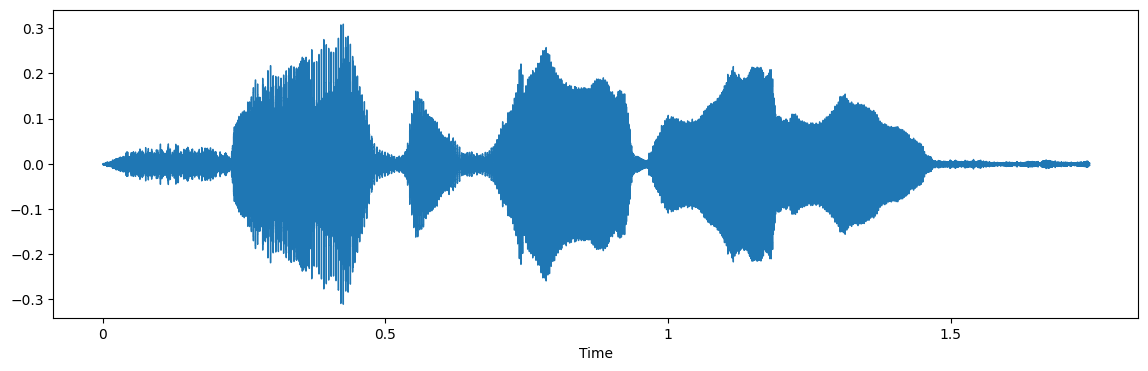

In [19]:
# Set the figure size for the plot
plt.figure(figsize=(14, 4))  # Width: 14 inches, Height: 4 inches

# Display the waveform of the audio data
librosa.display.waveshow(y=data, sr=sample_rate)  # Use waveshow for better performance and compatibility

# Prepare the audio for playback in Jupyter Notebooks
Audio(path)  # Create an audio player widget for the specified audio file

### **Applying `Noise` on Sample Data**

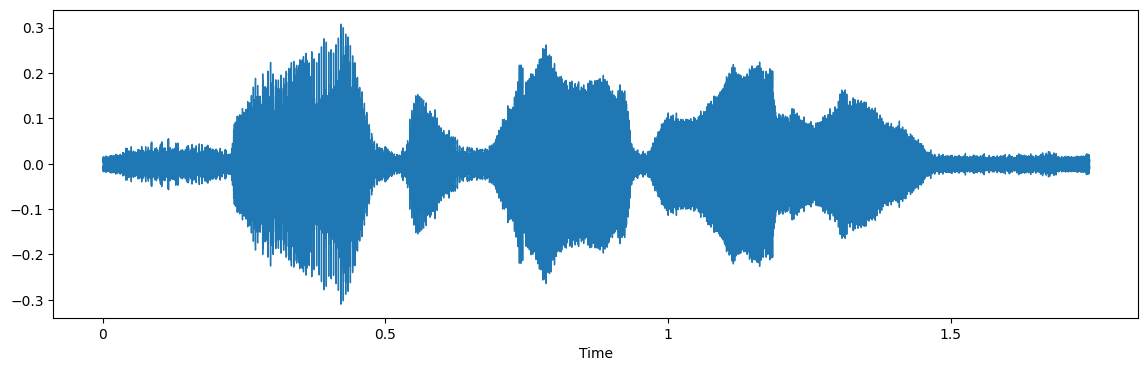

In [20]:
# Apply noise augmentation to the audio data
x = noise(data)  # Add random noise to the original audio data

# Set the figure size for the waveform plot
plt.figure(figsize=(14, 4))  # Width: 14 inches, Height: 4 inches

# Display the waveform of the noisy audio data
librosa.display.waveshow(y=x, sr=sample_rate)  # Visualize the waveplot of the noisy audio

# Prepare the noisy audio for playback in Jupyter Notebooks
Audio(x, rate=sample_rate)  # Create an audio player widget for the noisy audio with the specified sampling rate

### **Applying `Stretching` on Sample Data**

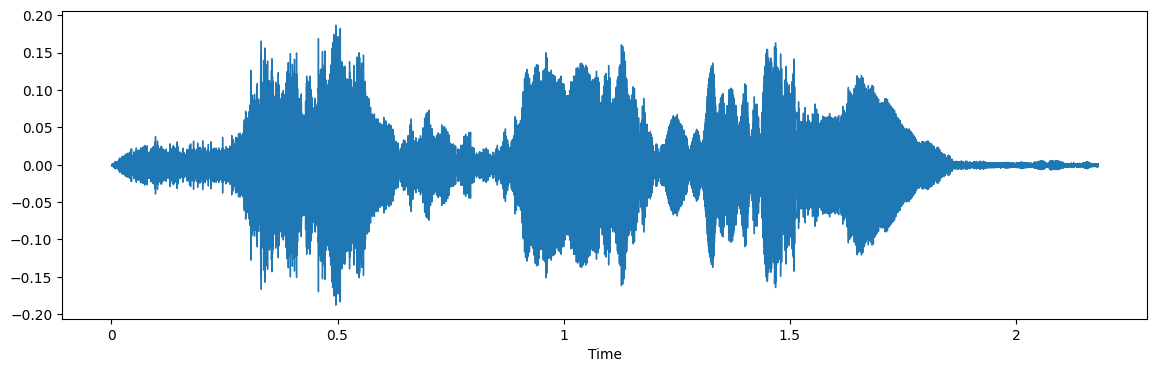

In [21]:
# Apply time stretching to the audio data
x = stretch(data)  # Stretch the original audio data in time using the stretch function

# Set the figure size for the waveform plot
plt.figure(figsize=(14, 4))  # Width: 14 inches, Height: 4 inches

# Display the waveform of the time-stretched audio data
librosa.display.waveshow(y=x, sr=sample_rate)  # Visualize the waveplot of the stretched audio

# Prepare the time-stretched audio for playback in Jupyter Notebooks
Audio(x, rate=sample_rate)  # Create an audio player widget for the stretched audio with the specified sampling rate

### **Applying `Shifting` on Sample Data**

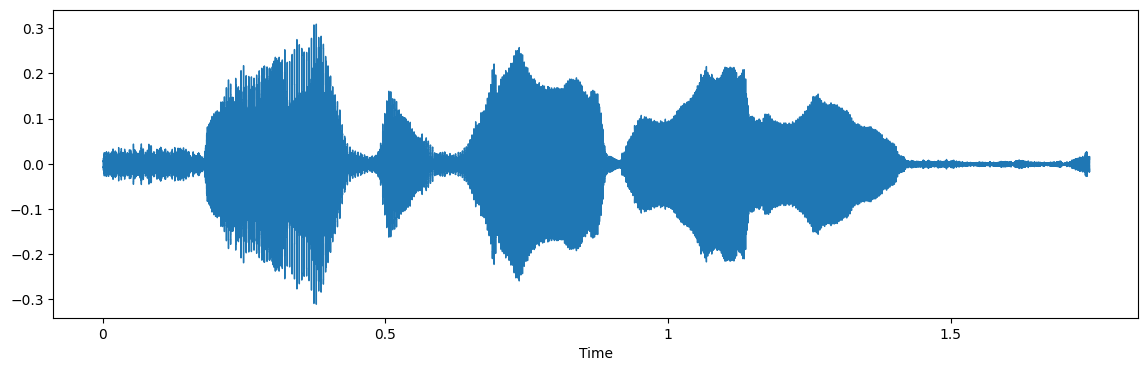

In [22]:
# Apply time shifting to the audio data
x = shift(data)  # Shift the original audio data in time using the shift function

# Set the figure size for the waveform plot
plt.figure(figsize=(14, 4))  # Width: 14 inches, Height: 4 inches

# Display the waveform of the time-shifted audio data
librosa.display.waveshow(y=x, sr=sample_rate)  # Visualize the waveplot of the shifted audio

# Prepare the time-shifted audio for playback in Jupyter Notebooks
Audio(x, rate=sample_rate)  # Create an audio player widget for the shifted audio with the specified sampling rate

### **Applying `Pitch` on Sample Data**

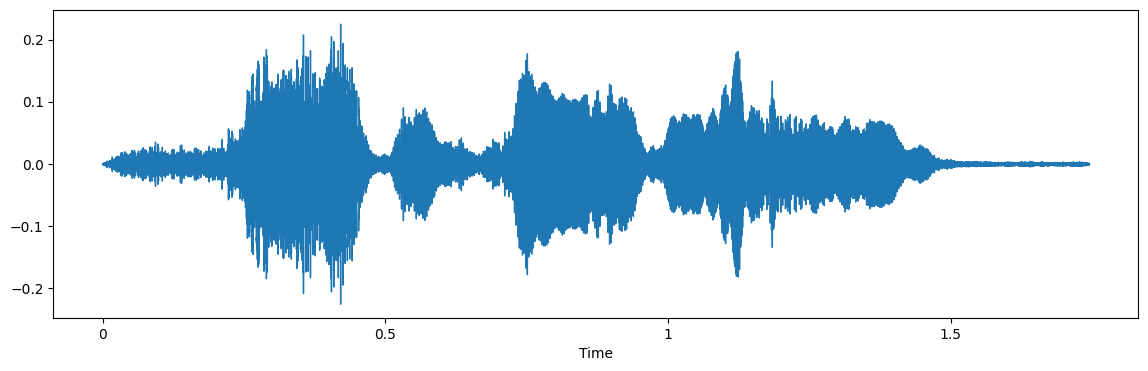

In [23]:
# Apply pitch shifting to the audio data
x = pitch(data, sample_rate)  # Shift the pitch of the original audio data using the pitch function

# Set the figure size for the waveform plot
plt.figure(figsize=(14, 4))  # Width: 14 inches, Height: 4 inches

# Display the waveform of the pitch-shifted audio data
librosa.display.waveshow(y=x, sr=sample_rate)  # Visualize the waveplot of the pitch-shifted audio

# Prepare the pitch-shifted audio for playback in Jupyter Notebooks
Audio(x, rate=sample_rate)  # Create an audio player widget for the pitch-shifted audio with the specified sampling rate

- **I am using noise injection, time stretching (changing speed), and pitch shifting from the various augmentation techniques mentioned above.**

## **Feature Extraction**

While there are numerous feature extraction techniques available, this project will focus on extracting the following five features for model training:

- Zero Crossing Rate
- Chroma STFT
- MFCC (Mel-frequency cepstral coefficients)
- RMS (Root Mean Square) value
- Mel Spectrogram

In [24]:
# Define a Function to extract features

def extract_features(data, sample_rate):
    """
    Extract audio features from the given audio data.

    Parameters:
    data: ndarray
        Audio time series.
    sample_rate: int
        Sampling rate of the audio.

    Returns:
    ndarray
        Extracted features as a flattened array.
    """
    # Initialize an empty array to hold the features
    result = np.array([])

    # Zero Crossing Rate (ZCR)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # Stack ZCR horizontally

    # Chroma STFT
    stft = np.abs(librosa.stft(data))  # Compute the Short-Time Fourier Transform (STFT)
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  # Stack Chroma STFT horizontally

    # Mel-frequency cepstral coefficients (MFCC)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # Stack MFCC horizontally

    # Root Mean Square (RMS) Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  # Stack RMS horizontally

    # Mel Spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))  # Stack Mel Spectrogram horizontally
    
    return result  # Return the extracted features

In [25]:
# Define a Function to get extracted features

def get_features(path):
    """
    Load audio data and extract features with and without augmentation.

    Parameters:
    path: str
        Path to the audio file.

    Returns:
    ndarray
        Combined features from original and augmented audio data.
    """
    # Load audio data with specified duration and offset to avoid silence
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # Extract features without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array([res1])  # Initialize result with original features

    # Data with noise augmentation
    noise_data = noise(data)  # Add noise to the original data
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))  # Stack features vertically

    # Data with stretching and pitching augmentations
    new_data = stretch(data)  # Apply time stretching
    data_stretch_pitch = pitch(new_data, sample_rate)  # Apply pitch shifting
    res3 = extract_features(data_stretch_pitch, sample_rate)
    result = np.vstack((result, res3))  # Stack features vertically
    
    return result  # Return the combined features

### **Feature Extraction and Label Preparation for Audio Data**

In [26]:
# Initialize lists to hold features (X) and corresponding emotions (Y)
X, Y = [], []

# Loop through each audio file path and its associated emotion
for path, emotion in zip(Tess_df.Path, Tess_df.Emotions):
    
    # Extract features from the audio file
    feature = get_features(path)
    
    # Loop through each extracted feature
    for ele in feature:
        X.append(ele)  # Append the feature to the list X
        # Append the emotion label three times, corresponding to the three augmentation techniques applied to each audio file
        Y.append(emotion)  # This ensures that the emotion label matches the augmented features

In [28]:
# Output the lengths of the feature list (X) and the label list (Y),
# as well as the shape of the data path to verify dataset consistency
len(X), len(Y), Tess_df.Path.shape  # len(X): number of extracted features, len(Y): number of emotion labels, data_path.Path.shape: total number of audio files

(8400, 8400, (2800,))

### **Creating and Saving a Features DataFrame**

In [29]:
# Create a DataFrame from the features list (X)
Features = pd.DataFrame(X)

# Add a new column 'labels' to the DataFrame containing the emotion labels (Y)
Features['labels'] = Y

# Save the DataFrame to a CSV file named 'features.csv' without including the index
Features.to_csv('features.csv', index=False)

# Display the first few rows of the DataFrame to verify its structure and content
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.065513,0.451476,0.345667,0.291290,0.345197,0.448006,0.739485,0.714230,0.403545,0.348377,...,0.001222,0.001316,0.000917,0.000588,0.001111,0.000922,0.000743,0.000479,0.000042,fear
1,0.094099,0.487751,0.396913,0.349843,0.402493,0.501762,0.747460,0.706630,0.436212,0.388668,...,0.003160,0.003781,0.003143,0.003018,0.003505,0.003496,0.003218,0.002894,0.002422,fear
2,0.071255,0.438578,0.362901,0.277629,0.315584,0.412454,0.724337,0.777023,0.421146,0.362014,...,0.000229,0.000332,0.000388,0.000407,0.000212,0.000262,0.000344,0.000190,0.000013,fear
3,0.121758,0.458905,0.358597,0.348286,0.438028,0.690155,0.589395,0.411843,0.371624,0.441341,...,0.001278,0.001357,0.001472,0.001584,0.001054,0.000631,0.000218,0.000086,0.000006,fear
4,0.123145,0.461016,0.362038,0.350656,0.442210,0.698199,0.590236,0.412767,0.371619,0.443377,...,0.001287,0.001356,0.001478,0.001592,0.001067,0.000638,0.000230,0.000095,0.000015,fear


- **We have performed data augmentation, extracted features from each audio file, and saved the results.**

## **Data Preparation**

We have extracted the data, and now we need to normalize it and split it into training and testing sets.

In [30]:
# Extract feature values from the DataFrame, excluding the last column (labels)
X = Features.iloc[:, :-1].values  # X contains all rows and all columns except the last one

# Extract the labels from the 'labels' column of the DataFrame
Y = Features['labels'].values  # Y contains the emotion labels corresponding to the features

### **Since this is a multiclass classification problem, we need to apply one-hot encoding to the labels (Y)**

In [31]:
encoder = OneHotEncoder()  # Initialize the OneHotEncoder

# Fit the encoder to the labels and transform them into a one-hot encoded format
Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()  # Reshape Y for compatibility and convert to a dense array

### **Split the dataset into training and testing sets**

In [32]:
# x_train and y_train will be used for training the model, while x_test and y_test will be used for evaluation
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

# Display the shapes of the training and testing sets to verify the split
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 162), (6300, 7), (2100, 162), (2100, 7))

### **Scale the data using sklearn's StandardScaler to standardize features by removing the mean and scaling to unit variance**

In [33]:
scaler = StandardScaler()  # Initialize the StandardScaler

# Fit the scaler to the training data and transform it
x_train = scaler.fit_transform(x_train)  # Apply scaling to the training data

# Transform the testing data using the fitted scaler (without fitting again)
x_test = scaler.transform(x_test)  # Apply the same scaling to the test data

# Display the shapes of the scaled training and testing sets to verify the scaling process
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 162), (6300, 7), (2100, 162), (2100, 7))

 ### **Expand the dimensions of the training and testing data to make them compatible with the model's input requirements**

In [34]:
x_train = np.expand_dims(x_train, axis=2)  # Add a new dimension to x_train at the specified axis (2)
x_test = np.expand_dims(x_test, axis=2)    # Add a new dimension to x_test at the specified axis (2)

# Display the shapes of the modified training and testing sets to verify the dimension changes
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 162, 1), (6300, 7), (2100, 162, 1), (2100, 7))

## **Applying Deep Learning Models**

### **Use RNN**

In [36]:
# Define a function to create the RNN model
def create_rnn_model(input_shape, num_classes):
    # Initialize a sequential model
    model = Sequential()
    
    # First SimpleRNN layer with 128 units
    # input_shape specifies the shape of the input data
    # return_sequences=True allows the next layer to receive the full sequence of outputs
    
    model.add(SimpleRNN(128, input_shape=input_shape, return_sequences=True))
    
    # Normalize the outputs of the previous layer
    model.add(BatchNormalization())
    
    # Apply dropout to prevent overfitting
    model.add(Dropout(0.3))
    
    # Second SimpleRNN layer with 64 units
    model.add(SimpleRNN(64, return_sequences=True))
    model.add(BatchNormalization())  # Normalize outputs
    model.add(Dropout(0.3))          # Apply dropout
    
    # Third SimpleRNN layer with 32 units
    model.add(SimpleRNN(32))         # Last layer does not return sequences
    model.add(BatchNormalization())   # Normalize outputs
    
    # Output layer with 'num_classes' units for multi-class classification
    # Uses softmax activation function to output probabilities for each class
    model.add(Dense(num_classes, activation='softmax'))
    
    # Return the constructed model
    return model

# Set the input shape based on the training data
input_shape = (162, 1)  # Each input sample has 162 time steps and 1 feature
num_classes = 7         # Number of emotion classes to predict

# Create the RNN model using the defined function
model = create_rnn_model(input_shape, num_classes)

# Compile the model with the Adam optimizer and categorical cross-entropy loss
# Metrics are set to track accuracy during training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display a summary of the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 162, 128)       │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 162, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 162, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 162, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 162, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 162, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,223 (129.78 KB)

 Trainable params: 32,775 (128.03 KB)

 Non-trainable params: 448 (1.75 KB)

### **Train this model**

In [37]:
# Fit the model on the training data

'''
- 'x_train' is the input data for training, and 'y_train' is the corresponding labels
-  'epochs' specifies the number of complete passes through the training dataset
-  'batch_size' defines the number of samples processed before the model is updated
-  'validation_data' is a tuple (x_test, y_test) used to evaluate the model's performance on unseen data after each epoch
'''

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50


I0000 00:00:1726158474.595288     233 service.cc:145] XLA service 0x57f93ab4b170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726158474.595350     233 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726158474.595372     233 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/197 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.1250 - loss: 2.4200 

I0000 00:00:1726158481.649030     233 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


197/197 ━━━━━━━━━━━━━━━━━━━━ 28s 83ms/step - accuracy: 0.1787 - loss: 2.1102 - val_accuracy: 0.1195 - val_loss: 2.0604
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.1382 - loss: 2.0572 - val_accuracy: 0.1486 - val_loss: 1.9897
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.1654 - loss: 1.9785 - val_accuracy: 0.2529 - val_loss: 1.8451
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.2719 - loss: 1.8189 - val_accuracy: 0.2662 - val_loss: 1.8198
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.2450 - loss: 1.8751 - val_accuracy: 0.1295 - val_loss: 1.9896
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.1624 - loss: 1.9887 - val_accuracy: 0.1048 - val_loss: 2.0122
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.1563 - loss: 1.9678 - val_accuracy: 0.1690 - val_loss: 1.9366
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.1401 - loss: 1.9757 - val_accuracy: 0.14

### **Evaluate the SimpleRNN Performance**

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2054 - loss: 1.9137
Accuracy of our model on test data: 20.000000298023224 %


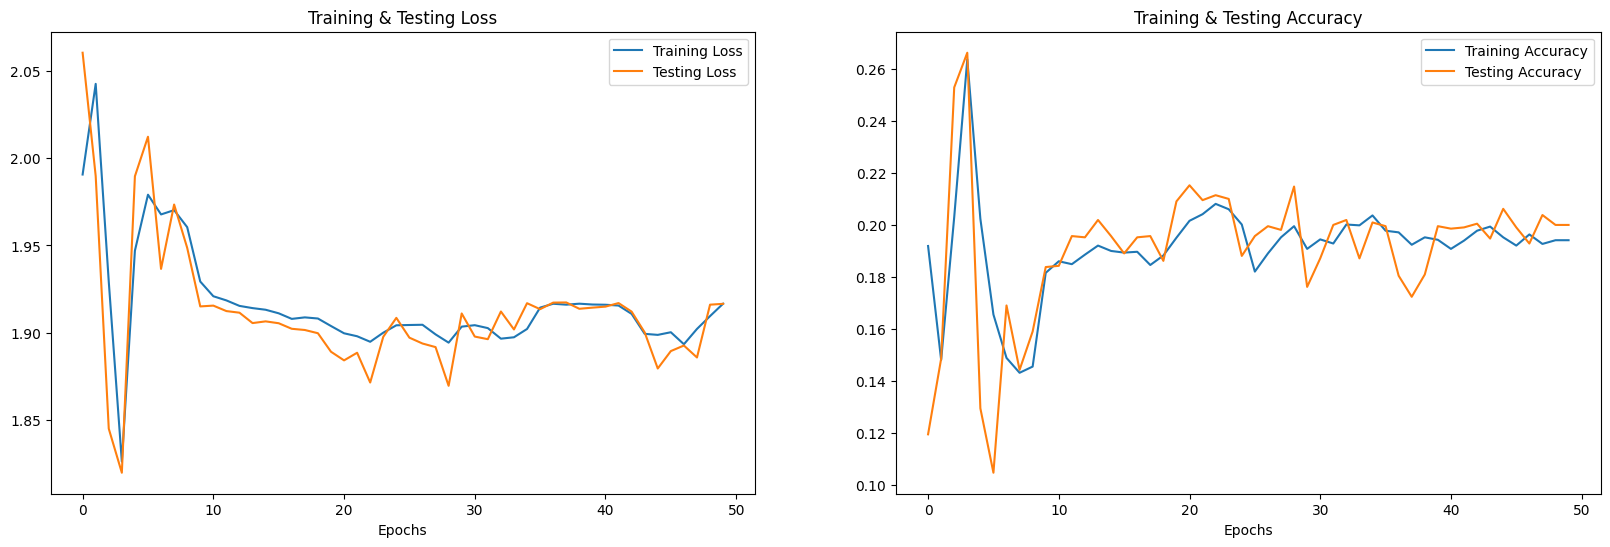

In [38]:
# Evaluate the model on the test data and print the accuracy
# model.evaluate returns a list where the second element is the accuracy
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

# Create a list of epochs for x-axis representation
epochs = [i for i in range(50)]  # Assuming you trained for 50 epochs

# Create subplots for loss and accuracy
fig, ax = plt.subplots(1, 2)  # 1 row, 2 columns of plots

# Extract training and validation metrics from the history object
train_acc = history.history['accuracy']       # Training accuracy for each epoch
train_loss = history.history['loss']           # Training loss for each epoch
test_acc = history.history['val_accuracy']     # Validation accuracy for each epoch
test_loss = history.history['val_loss']        # Validation loss for each epoch

# Set the size of the figure
fig.set_size_inches(20, 6)

# Plot the training and testing loss
ax[0].plot(epochs, train_loss, label='Training Loss')  # Plot training loss
ax[0].plot(epochs, test_loss, label='Testing Loss')    # Plot testing loss
ax[0].set_title('Training & Testing Loss')              # Title for the loss plot
ax[0].legend()                                         # Add a legend to the plot
ax[0].set_xlabel("Epochs")                            # Label for x-axis

# Plot the training and testing accuracy
ax[1].plot(epochs, train_acc, label='Training Accuracy')  # Plot training accuracy
ax[1].plot(epochs, test_acc, label='Testing Accuracy')    # Plot testing accuracy
ax[1].set_title('Training & Testing Accuracy')             # Title for the accuracy plot
ax[1].legend()                                           # Add a legend to the plot
ax[1].set_xlabel("Epochs")                              # Label for x-axis

# Display the plots
plt.show()

### **Use LSTM model**

In [39]:
# Define the LSTM model
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    
    # First LSTM layer
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # Second LSTM layer
    model.add(LSTM(64, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # Third LSTM layer
    model.add(LSTM(32))
    model.add(BatchNormalization())
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# Set input shape and number of classes
input_shape = (162, 1)  # Corresponding to x_train shape
num_classes = 7         # Corresponding to y_train shape

# Create the LSTM model
model = create_lstm_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 162, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 162, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 162, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 162, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 162, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 162, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,511 (505.90 KB)

 Trainable params: 129,063 (504.15 KB)

 Non-trainable params: 448 (1.75 KB)

In [40]:
# Fit the model on the training data
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.1969 - loss: 2.0120 - val_accuracy: 0.1576 - val_loss: 1.9644
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.2362 - loss: 1.8255 - val_accuracy: 0.2833 - val_loss: 1.7437
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.3097 - loss: 1.6931 - val_accuracy: 0.2690 - val_loss: 1.7905
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.3554 - loss: 1.6019 - val_accuracy: 0.3471 - val_loss: 1.7324
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4176 - loss: 1.4666 - val_accuracy: 0.3776 - val_loss: 1.5639
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.4863 - loss: 1.3313 - val_accuracy: 0.5148 - val_loss: 1.1986
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5125 - loss: 1.2430 - val_accuracy: 0.4214 - val_loss: 1.5380
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.5805 - loss: 1.0623 - val_acc

### **Evaluate LSTM Performance**

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8688 - loss: 0.3515
Accuracy of our model on test data: 87.99999952316284 %


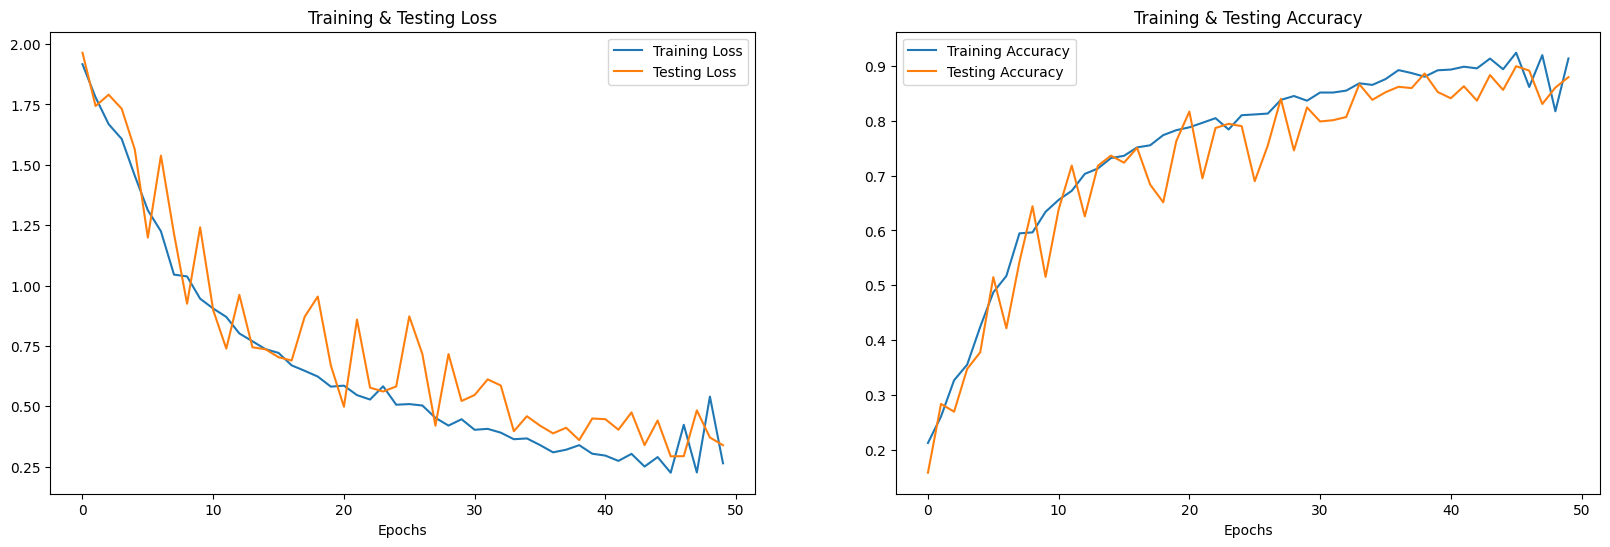

In [41]:
# Evaluate the model on the test data and print the accuracy
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

# Create a list of epochs for x-axis representation
epochs = [i for i in range(50)]  # Assuming you trained for 50 epochs

# Create subplots for loss and accuracy
fig, ax = plt.subplots(1, 2)  # 1 row, 2 columns of plots

# Extract training and validation metrics from the history object
train_acc = history.history['accuracy']       # Training accuracy for each epoch
train_loss = history.history['loss']           # Training loss for each epoch
test_acc = history.history['val_accuracy']     # Validation accuracy for each epoch
test_loss = history.history['val_loss']        # Validation loss for each epoch

# Set the size of the figure
fig.set_size_inches(20, 6)

# Plot the training and testing loss
ax[0].plot(epochs, train_loss, label='Training Loss')  # Plot training loss
ax[0].plot(epochs, test_loss, label='Testing Loss')    # Plot testing loss
ax[0].set_title('Training & Testing Loss')              # Title for the loss plot
ax[0].legend()                                         # Add a legend to the plot
ax[0].set_xlabel("Epochs")                            # Label for x-axis

# Plot the training and testing accuracy
ax[1].plot(epochs, train_acc, label='Training Accuracy')  # Plot training accuracy
ax[1].plot(epochs, test_acc, label='Testing Accuracy')    # Plot testing accuracy
ax[1].set_title('Training & Testing Accuracy')             # Title for the accuracy plot
ax[1].legend()                                           # Add a legend to the plot
ax[1].set_xlabel("Epochs")                              # Label for x-axis

# Display the plots
plt.show()

### **Predicting on test data**

In [45]:
# Predicting on test data
# Use the trained model to generate predictions for the test dataset
pred_test = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(pred_test, axis=1)

# Get the number of classes from the encoder
num_classes = encoder.categories_[0].size  # Number of classes based on the fitted encoder

# Convert predictions to one-hot encoding for inverse transformation
y_pred_one_hot = np.zeros((y_pred.size, num_classes))  # Use num_classes instead of encoder.n_classes_
y_pred_one_hot[np.arange(y_pred.size), y_pred] = 1

# Inverse transform the predicted labels back to their original form
y_pred_labels = encoder.inverse_transform(y_pred_one_hot)

# Inverse transform the true labels from y_test back to their original form
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test back to class labels

# Convert true labels to one-hot encoding for inverse transformation
y_test_one_hot = np.zeros((y_test_labels.size, num_classes))
y_test_one_hot[np.arange(y_test_labels.size), y_test_labels] = 1
y_test_labels_original = encoder.inverse_transform(y_test_one_hot)

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


## **Create a DataFrame to store predicted and actual labels**

In [49]:
# Create a DataFrame to store predicted and actual labels
# Initialize the DataFrame with specified column names
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])

# Flatten the predicted labels array to ensure it is a 1D array
# Assign the flattened predicted labels to the DataFrame's 'Predicted Labels' column
df['Predicted Labels'] = y_pred.flatten()

# Check if y_test is one-hot encoded or not
if len(y_test.shape) > 1:  # If y_test is one-hot encoded
    # Convert one-hot encoded y_test back to class labels
    y_test_labels = np.argmax(y_test, axis=1)  # Get the class indices
else:
    y_test_labels = y_test.flatten()  # If already in the correct shape

# Assign the flattened actual labels to the DataFrame's 'Actual Labels' column
df['Actual Labels'] = y_test_labels.flatten()

df.sample(10)

,Predicted Labels,Actual Labels
274,4,4
1401,2,2
808,4,4
1393,1,1
1799,3,1
2082,4,4
112,6,6
2099,2,2
1974,4,4
1526,4,4


In [53]:
# Create a DataFrame to store predicted and actual labels
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])

# Convert predicted labels to one-hot encoding before inverse transformation
predicted_one_hot = np.zeros((y_pred.size, encoder.categories_[0].size))
predicted_one_hot[np.arange(y_pred.size), y_pred] = 1

# Inverse transform the predicted labels to get the actual string labels
predicted_labels = encoder.inverse_transform(predicted_one_hot)

# Flatten the result to a 1D array
df['Predicted Labels'] = predicted_labels.flatten()

# Convert one-hot encoded y_test back to class labels if necessary
if len(y_test.shape) > 1:  # If y_test is one-hot encoded
    y_test_labels = np.argmax(y_test, axis=1)  # Get the class indices
else:
    y_test_labels = y_test.flatten()  # If already in the correct shape

# Create a one-hot encoded array for the actual labels
actual_one_hot = np.zeros((y_test_labels.size, encoder.categories_[0].size))
actual_one_hot[np.arange(y_test_labels.size), y_test_labels] = 1

# Inverse transform the actual labels to get the actual string labels
actual_labels = encoder.inverse_transform(actual_one_hot)

# Flatten the result to a 1D array
df['Actual Labels'] = actual_labels.flatten()

# Display the first 10 rows of the DataFrame to inspect the predicted and actual labels
df.sample(10)

,Predicted Labels,Actual Labels
1750,surprise,surprise
1800,disgust,disgust
1735,surprise,surprise
1354,fear,fear
1492,fear,fear
623,happy,happy
1122,neutral,neutral
1641,disgust,surprise
29,happy,happy
1311,neutral,neutral


### **Compute the confusion matrix using the actual and predicted labels**

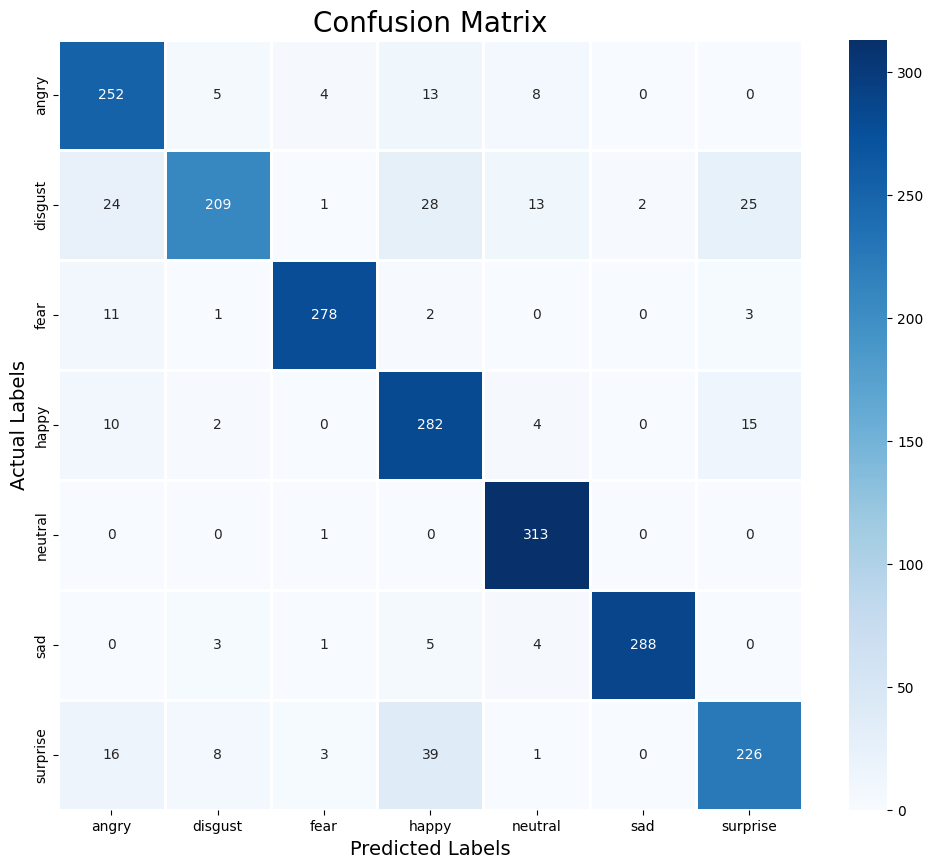

In [56]:
# Assuming df is your DataFrame with 'Predicted Labels' and 'Actual Labels'

# Create confusion matrix using the actual and predicted labels
# Use the first element of encoder.categories_ to get the class names
cm = confusion_matrix(df['Actual Labels'], df['Predicted Labels'], labels=encoder.categories_[0])

# Set the figure size for the plot
plt.figure(figsize=(12, 10))

# Create a DataFrame from the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=encoder.categories_[0], columns=encoder.categories_[0])

# Create a heatmap from the confusion matrix DataFrame
sns.heatmap(cm_df, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='d')

# Add title and labels to the plot
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)

# Display the plot
plt.show()

In [58]:
from sklearn.metrics import classification_report  # Import classification_report

# Convert y_test to class indices if it is one-hot encoded
if len(y_test.shape) > 1:  # Check if y_test is one-hot encoded
    y_test_labels = np.argmax(y_test, axis=1)  # Convert to class indices
else:
    y_test_labels = y_test.flatten()  # If already in the correct shape

# Now both y_test_labels and y_pred should be in the same format
print(classification_report(y_test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       282
           1       0.92      0.69      0.79       302
           2       0.97      0.94      0.95       295
           3       0.76      0.90      0.83       313
           4       0.91      1.00      0.95       314
           5       0.99      0.96      0.97       301
           6       0.84      0.77      0.80       293

    accuracy                           0.88      2100
   macro avg       0.89      0.88      0.88      2100
weighted avg       0.89      0.88      0.88      2100



In [59]:
# Save the model
model.save('lstm_model.h5')  # Save as HDF5 file

### **Make a Streamlit Web App with Saved Model**

- We will use saved LSTM model to make Prediction on music using Streamlit Web Interface that will classify music according to it's tone.  

## **Final Thoughts**

- The LSTM model outperforms the SimpleRNN on this dataset.
- With an accuracy of **88%** on the test data, there’s potential for improvement through hyperparameter tuning.
- This experimentation is just the beginning; consider exploring different features for further enhancements.